Parisa Kamizi Assignment 2.1

# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [4]:
#!pip install emoji
# ChatGPT was utilized on the assignment as a learning tool. 

import os
import re
import emoji
import pandas as pd
import numpy as np

import nltk
#nltk.download('stopwords')

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [5]:
# Add any additional import statements you need here

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/parisakamizi/Desktop/ADS509/Module Two/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [7]:
# Resources can be found at --> https://www.leonshpaner.com/projects/post/twitter_emotions/classifying_emotions_in_tweets

def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens/num_tokens
    num_characters = len("".join(tokens))
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [8]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: <!-- Your answer here --> Assertions are used when the user checks assumptions in the code, like conditions that should always be true during development, and they also provide feedback to developers about potential issues. Exceptions are used when handling unexpected problems, like invalid inputs or errors that require the program to recover, ensuring the robustness of the application. Assertions help you catch issues early and to check pre-conditions, post-conditions of internal code.

##### Recources can be found at --> https://stackoverflow.com/questions/1957645/when-to-use-an-assertion-and-when-to-use-an-exception

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [11]:
# Resources can be found at --> https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files

# use defaultdict from collections libaray to store the lyrics folder
lyrics_data = defaultdict(dict)

# Build a loop in lyrics subfolders to each songs
for artist_folder in os.listdir(os.path.join(data_location, lyrics_folder)):
    artist_path = os.path.join(data_location, lyrics_folder, artist_folder)

    # the contents of each singer is processed (all files are in .txt format)
    if os.path.isdir(artist_path):
        for song_file in os.listdir(artist_path):

            # to open the files, to read each file in the folder
            if song_file.endswith(".txt"):
                song_path = os.path.join(artist_path, song_file)
                with open(song_path, "r", encoding="utf-8") as f:
                    lyrics_data[artist_folder][song_file] = f.read()

In [12]:
# Display the files and the length of contents

for artist, songs in lyrics_data.items():
    print(f"Artist: {artist}")
    for song_file, lyrics in songs.items():
        print(f"  Song: {song_file} | Length: {len(lyrics)} characters")


Artist: robyn
  Song: robyn_includemeout.txt | Length: 2368 characters
  Song: robyn_electric.txt | Length: 1431 characters
  Song: robyn_beach2k20.txt | Length: 1498 characters
  Song: robyn_lovekills.txt | Length: 2319 characters
  Song: robyn_timemachine.txt | Length: 1132 characters
  Song: robyn_lovekills114524.txt | Length: 2324 characters
  Song: robyn_givingyouback.txt | Length: 1123 characters
  Song: robyn_noneofdem114527.txt | Length: 1109 characters
  Song: robyn_noneofdem.txt | Length: 1109 characters
  Song: robyn_bemine.txt | Length: 1879 characters
  Song: robyn_fembot114519.txt | Length: 2302 characters
  Song: robyn_shouldhaveknown.txt | Length: 1120 characters
  Song: robyn_underneaththeheart.txt | Length: 1059 characters
  Song: robyn_eclipse.txt | Length: 1091 characters
  Song: robyn_robynishere.txt | Length: 1377 characters
  Song: robyn_dontstopthemusic.txt | Length: 1439 characters
  Song: robyn_criminalintent.txt | Length: 2603 characters
  Song: robyn_myonlyr

In [13]:
## use defaultdict from collections libaray to store the twitter folder
twitter_data = defaultdict(list)

# Build a loop in twitter subfolders to each file inside
for twitter_file in os.listdir(os.path.join(data_location, twitter_folder)):

  # check files only have "followers_data.txt"
    if twitter_file.endswith("_followers_data.txt"):
        artist = twitter_file.split("_")[0]  
        
        # to open the files and read the folder
        with open(os.path.join(data_location, twitter_folder, twitter_file), "r", encoding="utf-8") as f:
            twitter_data[artist].extend(line.strip() for line in f)

In [14]:
#to check the length of twitter data

print(len(twitter_data['cher']))
print(len(twitter_data['robyn']))

3994804
0


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [16]:
punctuation = set(punctuation) # speeds up comparison

In [17]:
# Resources can be found --> https://www.youtube.com/watch?v=4DMSTKRMtcE&t=303s
# https://medium.com/%40st.remy.joanne/beginner-friendly-python-text-cleaning-project-2ca9bbad2251
# https://medium.com/%40pawan329/text-data-preprocessing-made-easy-steps-to-clean-text-data-using-python-81a138a0e0e3
# and https://www3.ntu.edu.sg/home/ehchua/programming/webprogramming/Python_FileText.html?utm_source=chatgpt.com

#create your clean lyrics data here

# data structure initialzed here to store each word
cleaned_lyrics_data = defaultdict(list)

# Iterate through the artist folders : the two artists
for artist_folder in os.listdir(data_location + lyrics_folder):
    artist_path = os.path.join(data_location, lyrics_folder, artist_folder)
    
    if os.path.isdir(artist_path):  
        # Iterate through the songs for each artist
        for song_file in os.listdir(artist_path):
            if song_file.endswith(".txt"):  # make sure is in .txt format
                # Extract names here
                song_name = song_file.replace(".txt", "")
                
                # Read lyrics
                with open(os.path.join(artist_path, song_file), "r", encoding="utf-8") as f:
                    lyrics = f.read()
                
                # Cleaning Process 
                # Remove punctuation
                lyrics = "".join([ch for ch in lyrics if ch not in punctuation])
                # Case fold and tokenize on whitespace
                tokens = [token.lower().strip() for token in lyrics.split()]
                # Remove stopwords
                cleaned_tokens = [token for token in tokens if token not in sw]
                
                # Store the tokens were cleaned 
                cleaned_lyrics_data[artist_folder].extend(cleaned_tokens)


In [18]:
## Resources can be found --> https://www.youtube.com/watch?v=4DMSTKRMtcE&t=303s
# https://medium.com/%40st.remy.joanne/beginner-friendly-python-text-cleaning-project-2ca9bbad2251
# https://medium.com/%40pawan329/text-data-preprocessing-made-easy-steps-to-clean-text-data-using-python-81a138a0e0e3
# and https://www3.ntu.edu.sg/home/ehchua/programming/webprogramming/Python_FileText.html?utm_source=chatgpt.com

# create your clean twitter data here

from collections import defaultdict
import string
from nltk.corpus import stopwords

# stopwords set
sw = set(stopwords.words('english'))
punctuation = string.punctuation

# dictionary to store cleaned Twitter data
twitter_processed = defaultdict(list)

# Iterate over each artist in twitter_data folder
for artist in twitter_data:
    for tweet in twitter_data[artist]:
        # Remove punctuation
        tweet = "".join([ch for ch in tweet if ch not in punctuation])
        
        # Case fold and split on whitespace
        tweet = [word.lower().strip() for word in tweet.split()]
        
        # Remove stopwords
        tweet = [word for word in tweet if word not in sw]
        
        # Store the processed tweet under artist 
        twitter_processed[artist].extend(tweet)

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [20]:
# calls to descriptive_stats here

# Descriptive statistics for robyn and cher
if 'robyn' in cleaned_lyrics_data:
    descriptive_stats(cleaned_lyrics_data['robyn'], num_tokens=10)

if 'cher' in cleaned_lyrics_data:
    descriptive_stats(cleaned_lyrics_data['cher'], num_tokens=10)

There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73787 characters in the data.
The lexical diversity is 0.142 in the data.
There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172634 characters in the data.
The lexical diversity is 0.103 in the data.


In [21]:
# descriptive stats for artists
descriptive_stats(twitter_processed['cher'], num_tokens=10)
descriptive_stats(twitter_processed['robynkonichiwa'], num_tokens=10)

There are 42404149 tokens in the data.
There are 10667109 unique tokens in the data.
There are 266424726 characters in the data.
The lexical diversity is 0.252 in the data.
There are 3888265 tokens in the data.
There are 1136751 unique tokens in the data.
There are 24106279 characters in the data.
The lexical diversity is 0.292 in the data.


[3888265, 1136751, 0.29235430198301815, 24106279]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If we left stopwords in the data, it would have been much noisier and so different. Stopwords are used frequently in almost every sentence and don't carry significant meaning, so their presence in the data could skew the frequency distribution of the words, overshadowing the more meaningful content and interpret the data into a wrong analysis. This could make it harder to identify important themes or trends. 

##### Resources can be found at --> https://medium.com/%40gelsonm/to-use-or-lose-stop-words-in-nlp-de946edaa468

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I initially expected Robyn to have a higher lexical diversity than Cher, due to her more varied and experimental musical style. The results mostly align with this belief, as Robyn's lyrics show a higher lexical diversity (0.142) compared to Cher's (0.103), and Robyn's Twitter data also has a higher diversity (0.292) than Cher's (0.252). However, the earlier assignment data, where both artists had a lexical diversity of 0.692, suggests that initially, the vocabulary range used by both artists was more balanced.


## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [24]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [26]:
# Resources can be found --> https://www.youtube.com/watch?v=J9f8CRd0-qw
# https://stackoverflow.com/questions/43146528/how-to-extract-all-the-emojis-from-text
# and https://gist.github.com/jezdez/0185e35704dbdf3c880f

# Your code here

def extract_top_10_emojis(twitter_data):
    emojis = defaultdict(list)

    # Extract emojis for each artist
    for artist in twitter_data:
        for desc in twitter_data[artist]:
            emojis[artist].extend([ch for ch in desc if emoji.is_emoji(ch)])

    # Print the top 10 most common emojis for each artist
    top_emojis = {}
    for artist in emojis:
        top_emojis[artist] = Counter(emojis[artist]).most_common(10)
    
    return top_emojis

extract_top_10_emojis(twitter_data)

{'cher': [('❤', 94506),
  ('🌈', 66291),
  ('♥', 48059),
  ('🏳', 47174),
  ('✨', 45846),
  ('🌊', 31234),
  ('💙', 31050),
  ('🏻', 25195),
  ('✌', 21963),
  ('💜', 21571)],
 'robynkonichiwa': [('🌈', 6086),
  ('❤', 5635),
  ('🏳', 4641),
  ('♥', 4249),
  ('✨', 3217),
  ('🏻', 1751),
  ('✌', 1495),
  ('♀', 1347),
  ('🏼', 1340),
  ('💙', 1200)]}

### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [28]:
# Resources can be found --> https://docs.python.org/3/library/re.html
# and https://stackoverflow.com/questions/2527892/parsing-a-tweet-to-extract-hashtags-into-an-array

# Your code here

def extract_top_10_hashtags(twitter_data):
    hashtags = defaultdict(list)

    # Extract hashtags for each artist
    for artist in twitter_data:
        for desc in twitter_data[artist]:
            hashtags[artist].extend(re.findall(r'#\w+', desc))  # Find all hashtags in the description

    # Get the top 10 most common hashtags for each artist
    top_hashtags = {}
    for artist in hashtags:
        top_hashtags[artist] = Counter(hashtags[artist]).most_common(10)
    
    return top_hashtags

extract_top_10_hashtags(twitter_data)

{'cher': [('#BLM', 10100),
  ('#Resist', 6161),
  ('#BlackLivesMatter', 4888),
  ('#resist', 3860),
  ('#FBR', 3330),
  ('#1', 3111),
  ('#TheResistance', 3044),
  ('#blacklivesmatter', 2738),
  ('#Resistance', 1953),
  ('#RESIST', 1878)],
 'robynkonichiwa': [('#BlackLivesMatter', 356),
  ('#BLM', 345),
  ('#1', 228),
  ('#blacklivesmatter', 222),
  ('#music', 175),
  ('#Music', 114),
  ('#EDM', 87),
  ('#LGBTQ', 76),
  ('#blm', 60),
  ('#TeamFollowBack', 59)]}

### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [30]:
# Resources can be found --> https://www.w3schools.com/python/ref_string_split.asp
# https://docs.python.org/3/library/collections.html#collections.defaultdict
# https://www.w3schools.com/python/ref_string_lower.asp
# https://docs.python.org/3/tutorial/datastructures.html#more-on-dictionaries
# and https://docs.python.org/3/library/collections.html#collections.Counter.most_common

# Your code here

from collections import defaultdict, Counter

def extract_top_5_words_in_titles(lyrics_data):
    title_tokens = defaultdict(list)

    # Iterate through the lyrics data for each artist
    for artist in lyrics_data:
        for song, page in lyrics_data[artist].items():
            # splitting lyrics title to lines, then splitting title to words, 
            #convert to lowercase, then add them to words
            page = page.split("\n")   
            title_tokens[artist].extend([item.lower() for item in page[0].split()])

    # Get the top 5 most common words in song titles for each artist
    top_words = {}
    for artist in title_tokens:
        top_words[artist] = Counter(title_tokens[artist]).most_common(5)
    
    return top_words

extract_top_5_words_in_titles(lyrics_data)


{'robyn': [('me', 7), ('you', 7), ('the', 7), ('my', 6), ('to', 6)],
 'cher': [('the', 29), ('to', 28), ('"the', 24), ('of', 21), ('"i', 21)]}

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.11;0.775x0.77)
Artist 2    AxesSubplot(0.125,0.11;0.775x0.77)
Name: length, dtype: object

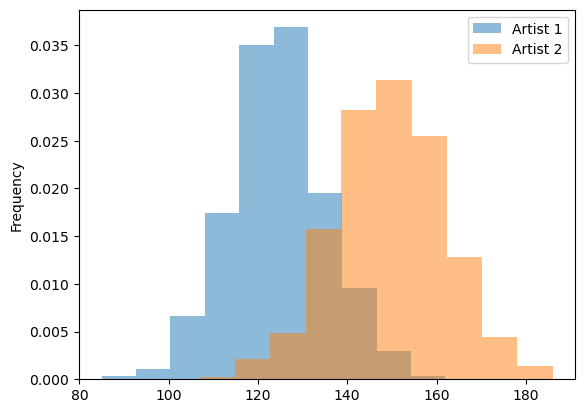

In [32]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The regular expression \s+ matches one or more whitespace characters (like spaces, tabs, or newlines) that separate words. 

##### Resources can be found from --> https://www3.ntu.edu.sg/home/ehchua/programming/howto/Regexe.html


In [34]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

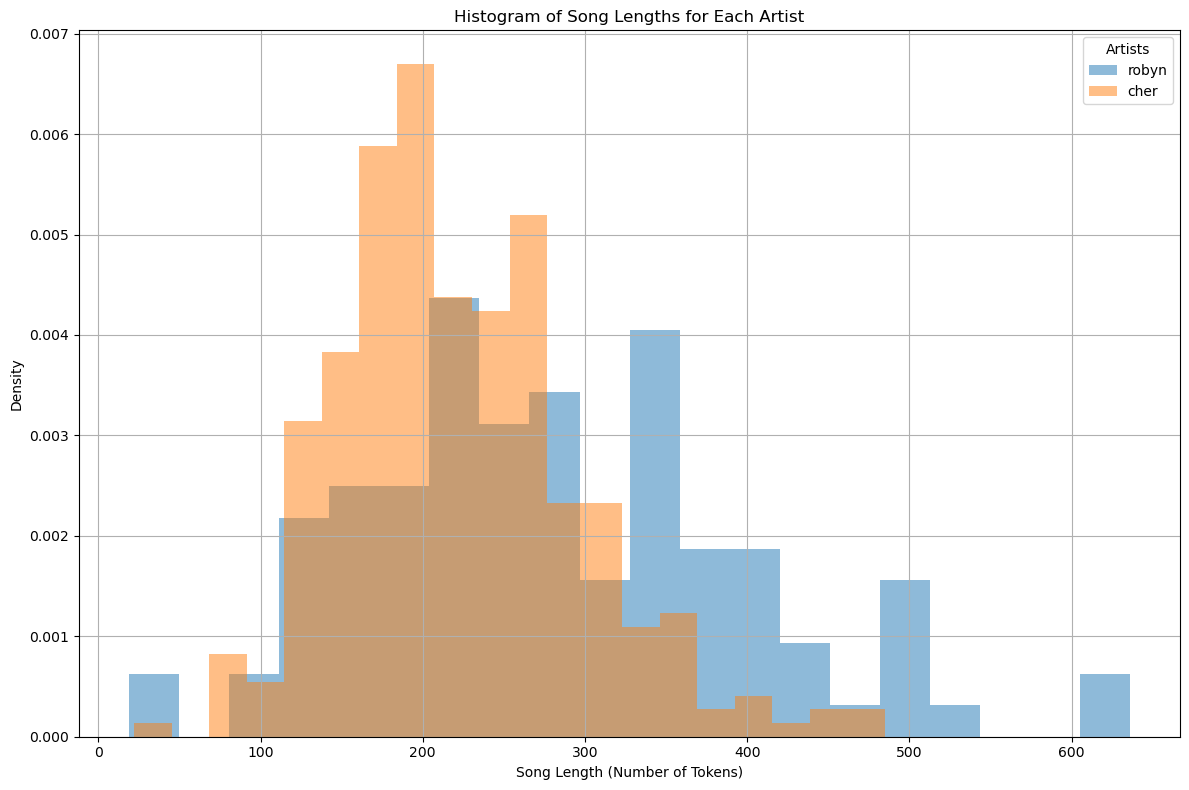

In [35]:
# Resouces can be found at --> https://docs.python.org/3/tutorial/datastructures.html#more-on-dictionaries
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
# https://www.geeksforgeeks.org/python-pandas-dataframe/
# https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/
# and https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Normalize.html

# Your code here

def plot_song_length_histograms(lyrics_data, bins=20, normalize=False):

    song_lengths = defaultdict(list)

    # Iterate through the lyrics to calculate each song's length
    for artist in lyrics_data:
        for song, page in lyrics_data[artist].items():
            # Split lyrics by line, count tokens in the entire words in song, convert to lowercase
            page = page.split("\n")
            song_tokens = [item.lower() for line in page for item in line.split()]
            song_lengths[artist].append(len(song_tokens))  

    # Convert the song lengths into a DataFrame
    song_lengths_df = pd.DataFrame([(artist, length) for artist, lengths in song_lengths.items() for length in lengths],
                                   columns=["Artist", "Song Length"])

    # histograms of song lengths for each artist
    plt.figure(figsize=(12, 8))
    for artist in song_lengths:
        artist_data = song_lengths_df[song_lengths_df["Artist"] == artist]
        plt.hist(artist_data["Song Length"], bins=bins, alpha=0.5, label=artist, density=normalize)

    # labels and titles
    plt.xlabel('Song Length (Number of Tokens)')
    plt.ylabel('Density' if normalize else 'Frequency')
    plt.title('Histogram of Song Lengths for Each Artist')
    plt.legend(title='Artists')
    plt.grid(True)
    plt.tight_layout()  # Prevent clipping of axis labels
    plt.show()

plot_song_length_histograms(lyrics_data, bins=20, normalize=True)


In [72]:
!pip install --upgrade nbconvert
!pip install --upgrade PyPDF2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 4.8 MB/s eta 0:00:0000:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 7.16.4
    Uninstalling nbconvert-7.16.4:
      Successfully uninstalled nbconvert-7.16.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, but you have pyqt5 5.15.10 which is incompatible.
spyder 5.2.2 requires pyqtwebengine<5.13, but you have pyqtwebengine 5.15.6 which is incompatible.


In [38]:
!latex --version


zsh:1: command not found: latex


In [80]:
!jupyter nbconvert --to html "/Users/parisakamizi/ADS-509 Text Mining/Lyrics and Description EDA .ipynb"


[NbConvertApp] Converting notebook /Users/parisakamizi/ADS-509 Text Mining/Lyrics and Description EDA .ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 452044 bytes to /Users/parisakamizi/ADS-509 Text Mining/Lyrics and Description EDA .html
